# <p> Regresion Logistica

<p>las tablas de contingencia

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
import seaborn as snb

In [2]:
df = pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\gender-purchase\Gender Purchase.csv')
df

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes
...,...,...
506,Male,Yes
507,Female,Yes
508,Male,No
509,Female,Yes


In [3]:
conteng = pd.crosstab(df['Gender'],df['Purchase'])
conteng

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [4]:
print(conteng.sum(axis = 1))
print(conteng.sum(axis = 0))

Gender
Female    265
Male      246
dtype: int64
Purchase
No     231
Yes    280
dtype: int64


In [5]:
conteng.astype('float').div(conteng.sum(axis=1), axis = 0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Regresion Logistica con Statsmodels

In [6]:
import statsmodels.api as sm
import pandas as pd

In [7]:
Y = [0,0,0,0,1,0,1,0,1,1]
X = np.array(range(10)).reshape(10,1)
bias = np.ones(10).reshape(10,1)
X_new = np.append(X,bias, axis = 1)

logit_model = sm.Logit(Y, X_new)

In [8]:
y = pd.DataFrame(np.array(Y).reshape(10,1))
x_new = pd.DataFrame(X_new)
print(X_new , Y)
pd.concat([y,x_new], axis = 1)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]] [0, 0, 0, 0, 1, 0, 1, 0, 1, 1]


,0,0,1
0,0,0.0,1.0
1,0,1.0,1.0
2,0,2.0,1.0
3,0,3.0,1.0
4,1,4.0,1.0
5,0,5.0,1.0
6,1,6.0,1.0
7,0,7.0,1.0
8,1,8.0,1.0
9,1,9.0,1.0


In [9]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [10]:
print(result.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.360   
Dependent Variable: y                AIC:              12.6202 
Date:               2020-04-27 19:30 BIC:              13.2254 
No. Observations:   10               Log-Likelihood:   -4.3101 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.027807
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.6622     0.4001    1.6551   0.0979   -0.1220   1.4464
const    -3.6956     2.2889   -1.6145   0.1064   -8.1818   0.7906



# Ejemplo con base de datos del titanic

In [11]:
data= pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\titanic\titanic3.csv')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [13]:
d=data.dtypes=='float'
d

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin        False
embarked     False
boat         False
body          True
home.dest    False
dtype: bool

In [14]:
data = data[['age','fare','body','survived']]
data

,age,fare,body,survived
0,29.0000,211.3375,NaN,1
1,0.9167,151.5500,NaN,1
2,2.0000,151.5500,NaN,0
3,30.0000,151.5500,135.0,0
4,25.0000,151.5500,NaN,0
...,...,...,...,...
1304,14.5000,14.4542,328.0,0
1305,NaN,14.4542,NaN,0
1306,26.5000,7.2250,304.0,0
1307,27.0000,7.2250,NaN,0


In [15]:
data['age'] = data['age'].fillna(np.mean(data['age']))
data['fare'] = data['fare'].fillna(np.mean(data['fare']))
data['body'] = data['body'].fillna(np.mean(data['body']))

D:\Documentos\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Documentos\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Documentos\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [16]:
modlogit = sm.Logit(data['survived'],data.drop('survived', axis = 1)).fit()

Optimization terminated successfully.
         Current function value: 0.627611
         Iterations 5


In [17]:
modlogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                 0.05625
Time:                        19:30:10   Log-Likelihood:                -821.54
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                 5.402e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0195      0.004     -4.365      0.000      -0.028      -0.011
fare           0.0135      0.002      8.080      0.000       0.010       0.017
body          -0.0020      0.001     -2.377      0.017      -0.004      -0.000
==============================================================================
"""

(array([ 44., 449., 488., 143.,  88.,  29.,  21.,  11.,  21.,  15.]),
 array([0.15893247, 0.24276833, 0.32660419, 0.41044005, 0.49427591,
        0.57811177, 0.66194763, 0.74578349, 0.82961935, 0.91345521,
        0.99729107]),
 <a list of 10 Patch objects>)

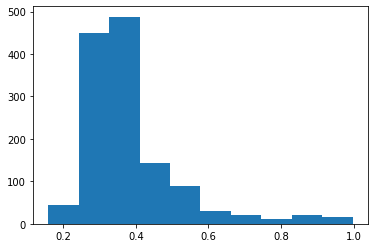

In [18]:
%matplotlib inline
p = modlogit.predict(data.drop('survived', axis = 1))
plt.hist(p)

In [19]:
np.mean(np.abs(p-data['survived']))

0.4367100062098229

In [20]:
fpr, tpr, thresholds = mtr.roc_curve(data['survived'], p, pos_label=1)
mtr.auc(fpr, tpr)

0.6771075401730532

In [21]:
# volviendo las probabilidades una clasificacion
p[p>0.5]=1
p[p<=0.5]=0
p = p.astype(int)

In [22]:
# tasa de malos clasificados
np.mean(np.abs(p - data['survived']))

0.34835752482811305

In [23]:
# matriz de confusion
mtr.confusion_matrix(data['survived'], p)

array([[743,  66],
       [390, 110]], dtype=int64)

# Regresion logistica para predicciones bancarias

In [24]:
data = pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\bank\bank.csv',
                  sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [25]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [26]:
data['y'] = (data['y']=='yes').astype(int)

In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [28]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [29]:
# Cambiar datos dada una condicion
data['education'] = np.where(data['education']=='basic.4y', 'basic', data['education'])
data['education'] = np.where(data['education']=='basic.6y', 'basic', data['education'])
data['education'] = np.where(data['education']=='basic.9y', 'basic', data['education'])

In [30]:
data['education'].unique()

array(['basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [31]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [32]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

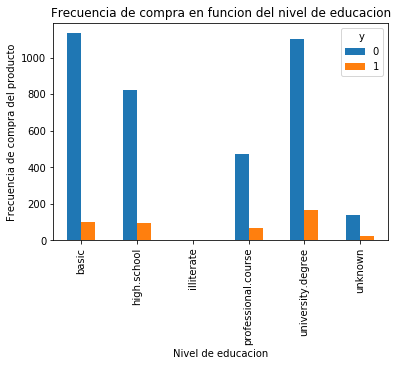

In [33]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = 'bar')
plt.title('Frecuencia de compra en funcion del nivel de educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Frecuencia de compra del producto')

Text(0, 0.5, 'Proporcion de clientes')

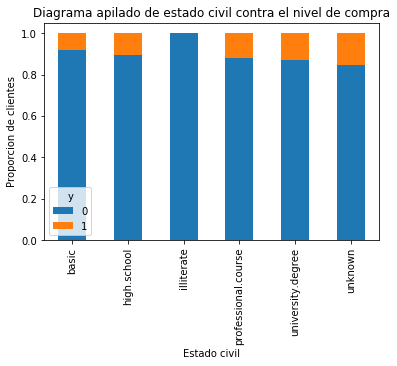

In [34]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Diagrama apilado de estado civil contra el nivel de compra')
plt.xlabel('Estado civil')
plt.ylabel('Proporcion de clientes')

Text(0, 0.5, 'frecuencia de compra')

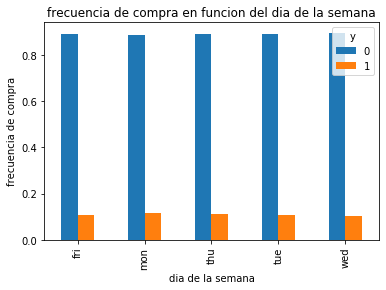

In [35]:
%matplotlib inline
table = pd.crosstab(data.day_of_week , data.y)
table.div(table.sum(1), axis = 0).plot(kind = 'bar')
plt.title('frecuencia de compra en funcion del dia de la semana')
plt.xlabel('dia de la semana')
plt.ylabel('frecuencia de compra')

Text(0, 0.5, 'frecuencia de compra')

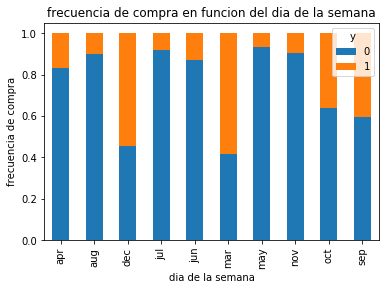

In [36]:
%matplotlib inline
table = pd.crosstab(data.month , data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('frecuencia de compra en funcion del dia de la semana')
plt.xlabel('dia de la semana')
plt.ylabel('frecuencia de compra')

Text(0, 0.5, 'Cliente')

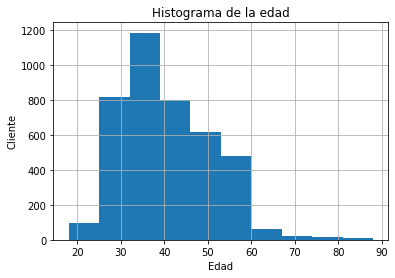

In [37]:
%matplotlib inline
data.age.hist()
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

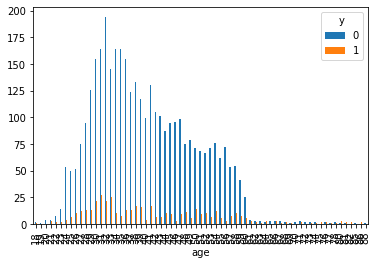

In [38]:
pd.crosstab(data.age, data.y).plot(kind = 'bar')

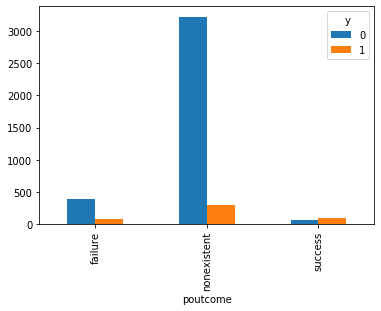

In [39]:
pd.crosstab(data.poutcome, data.y).plot(kind = 'bar')

### Conversion de las variables categoricas a dummies

In [40]:
categories = ['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 
              'day_of_week', 'poutcome']
for category in categories:
    cat_list = 'cat'+ '_'+category
    cat_dummies=pd.get_dummies(data[category], prefix = cat_list)
    data = data.join(cat_dummies)

In [41]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic,no,yes,yes,cellular,jul,thu,...,0,0,0,0,1,0,0,0,1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,0,0,1,0,0,0,0,0,1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,0,0,0,1,0,0,0,1,0,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,1,0


In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_marital_divorced',
       'cat_marital_married', 'cat_marital_single', 'cat_marital_unknown',
       'cat_education_basic', 'cat_education_high.school',
       'cat_education_illiterate', 'cat_education_professional.course',
       'cat_education_university.degree', 'cat_education_unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loa

In [43]:
bank_data = data.drop(categories, axis = 1)
bank_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married', 'cat_marital_single',
       'cat_marital_unknown', 'cat_education_basic',
       'cat_education_high.school', 'cat_education_illiterate',
       'cat_education_professional.course', 'cat_education_university.degree',
       'cat_education_unknown', 'cat_default_no', 'cat_default_unknown',
       'cat_default_yes', 'cat_housing_no', 'cat_housing_unknown',
       'cat_housing_yes', 'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
      

In [44]:
y = bank_data['y']
x = bank_data.drop('y', axis = 1)

### seleccion de variables

In [45]:
n = 12
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
rfe = RFE(lr, n)
rfe = rfe.fit(x,y)

D:\Documentos\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Documentos\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

D:\Documentos\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Documentos\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [48]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True])

In [49]:
rfe.ranking_

array([32, 44, 20, 47,  1, 19, 26, 24,  1, 41,  2, 13, 11, 42, 12,  1,  8,
       33,  3,  1,  1, 46, 17, 36, 31, 49, 30, 14, 48, 21, 35,  7, 38, 27,
       50,  9, 16, 45, 15, 22, 40,  5, 25,  1,  6,  1, 23,  4,  1,  1,  1,
       39, 18, 43, 28, 37, 29, 10,  1, 34,  1])

In [50]:
bank_data_vars = bank_data.columns.values.tolist()
dvars=pd.DataFrame(np.array(list(zip(bank_data_vars,rfe.support_))).reshape(61,2),columns=['vars','TF'])
dvars

,vars,TF
0,age,False
1,duration,False
2,campaign,False
3,pdays,False
4,previous,True
...,...,...
56,cat_day_of_week_thu,False
57,cat_day_of_week_tue,False
58,cat_day_of_week_wed,True
59,cat_poutcome_failure,False


In [51]:
dvars['TF']==True

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Name: TF, Length: 61, dtype: bool

In [52]:
dvars['TF'] = dvars['TF'].astype('category')
dvars

,vars,TF
0,age,False
1,duration,False
2,campaign,False
3,pdays,False
4,previous,True
...,...,...
56,cat_day_of_week_thu,False
57,cat_day_of_week_tue,False
58,cat_day_of_week_wed,True
59,cat_poutcome_failure,False


In [53]:
var = dvars[dvars['TF']=='True']['vars'].values.tolist()
var

['previous',
 'euribor3m',
 'cat_job_management',
 'cat_job_student',
 'cat_job_technician',
 'cat_contact_telephone',
 'cat_month_aug',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_day_of_week_wed',
 'cat_poutcome_nonexistent']

In [54]:
x = bank_data[var]
y = bank_data['y']
bank_data[var]

,previous,euribor3m,cat_job_management,cat_job_student,cat_job_technician,cat_contact_telephone,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
0,0,1.313,0,0,0,0,0,0,0,1,0,1
1,0,4.855,0,0,0,1,0,0,0,1,0,1
2,0,4.962,0,0,0,1,0,1,0,0,1,1
3,0,4.959,0,0,0,1,0,1,0,0,0,1
4,0,4.191,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,4.958,0,0,0,0,0,0,0,0,0,1
4115,0,4.959,0,0,0,1,0,0,0,0,0,1
4116,1,1.354,0,1,0,0,0,0,0,1,0,0
4117,0,4.966,0,0,0,0,1,0,0,0,0,1


### Modelo en python con statsmodel.api

In [55]:
import statsmodels.api as sm

In [56]:
modlogit = sm.Logit(y, x).fit()
modlogit.summary()

Optimization terminated successfully.
         Current function value: 0.287935
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.1665
Time:                        19:30:33   Log-Likelihood:                -1186.0
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 1.212e-94
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
previous                     0.1351      0.071      1.895      0.058      -0.005       0.275
euribor3m                   -0.5405      0.035    -15.417      0.000      -0.609      -0.472
cat_job_management          -0.3224      0.216     -1.492      0.136      -0.746       0.101
cat_job_student             -0.1471      0.292     -0.504      0.614      -0.719       0.425
cat_job_technician           0.0422      0.145      0.290      0.772      -0.243       0.327
cat_contact_telephone       -0.2261      0.161     -1.407      0.159      -0.541       0.089
cat_month_aug               -0.0258      0.166     -0.155      0.876      -0.352       0.300
cat_month_jun                0.4525      0.178      2.542      0.011       0.104       0.801
cat_month_mar                1.0927      0.313      3.487      0.000       0.478       1.707
cat_month_may               -1.0991      0.134     -8.213      0.000      -1.361      -0.837
cat_day_of_week_wed          0.0727      0.140      0.521      0.603      -0.201       0.346
cat_poutcome_nonexistent    -0.2833      0.131     -2.168      0.030      -0.539      -0.027
============================================================================================
"""

## Modelo en python con sckitlearn 

In [57]:
from sklearn import linear_model

In [58]:
logitmod = linear_model.LogisticRegression()
logitmod.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
logitmod.score(x,y)

0.8958485069191552

In [60]:
1-y.mean()

0.8905074047098811

In [61]:
pd.DataFrame(list(zip(x.columns, np.transpose(logitmod.coef_))))

,0,1
0,previous,[0.5276548327777301]
1,euribor3m,[-0.4961339886564675]
2,cat_job_management,[-0.2944858746427711]
3,cat_job_student,[0.007395877567854534]
4,cat_job_technician,[0.11370831143577662]
5,cat_contact_telephone,[-0.26145186952104765]
6,cat_month_aug,[0.020826218816464816]
7,cat_month_jun,[0.5115512583271388]
8,cat_month_mar,[1.1328068802724498]
9,cat_month_may,[-0.9152031082703572]


## Validacion del modelo Logistico

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 13)

In [64]:
x_train

,previous,euribor3m,cat_job_management,cat_job_student,cat_job_technician,cat_contact_telephone,cat_month_aug,cat_month_jun,cat_month_mar,cat_month_may,cat_day_of_week_wed,cat_poutcome_nonexistent
1567,0,4.947,0,0,0,1,0,1,0,0,0,1
3679,0,4.857,0,0,1,1,0,0,0,1,0,1
3950,0,4.962,0,0,0,1,0,1,0,0,1,1
2697,0,4.963,1,0,0,0,0,0,0,0,1,1
219,0,4.959,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,3,0.835,0,0,0,0,0,0,0,0,0,0
866,0,4.857,0,0,0,1,0,0,0,1,0,1
2790,0,4.961,0,0,1,1,0,1,0,0,0,1
74,0,4.966,0,0,1,0,1,0,0,0,0,1


In [65]:
lm = linear_model.LogisticRegression().fit(x_train,y_train)

In [66]:
ps = lm.predict_proba(x_test)
ps

array([[0.9781271 , 0.0218729 ],
       [0.67289327, 0.32710673],
       [0.94384222, 0.05615778],
       ...,
       [0.94427319, 0.05572681],
       [0.85410585, 0.14589415],
       [0.67154187, 0.32845813]])

In [67]:
prediction = lm.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
p = ps[:,1]
probs_df = pd.DataFrame(p)
threshoold = 0.1
probs_df['prediction'] = np.where(probs_df[0]>threshoold,1,0)
probs_df

,0,prediction
0,0.021873,0
1,0.327107,1
2,0.056158,0
3,0.050639,0
4,0.064758,0
...,...,...
1231,0.055677,0
1232,0.125813,1
1233,0.055727,0
1234,0.145894,1


In [69]:
pd.crosstab(probs_df.prediction, columns='count')

col_0,count
prediction,
0,847
1,389


In [70]:
390/len(probs_df)*100

31.55339805825243

In [71]:
threshoold = 0.1
probs_df['prediction'] = np.where(probs_df[0]>threshoold,1,0)
probs_df

,0,prediction
0,0.021873,0
1,0.327107,1
2,0.056158,0
3,0.050639,0
4,0.064758,0
...,...,...
1231,0.055677,0
1232,0.125813,1
1233,0.055727,0
1234,0.145894,1


In [72]:
print(389/len(probs_df)*100)
pd.crosstab(probs_df.prediction, columns='count')


31.472491909385113


col_0,count
prediction,
0,847
1,389


In [73]:
mtr.accuracy_score(y_test,prediction)

0.8980582524271845

# Validacion cruzada

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(linear_model.LogisticRegression(), x,y, scoring='accuracy', cv = 12)

In [76]:
scores

array([0.89825581, 0.89534884, 0.89534884, 0.90087464, 0.90670554,
       0.89504373, 0.89504373, 0.88338192, 0.88629738, 0.89212828,
       0.89504373, 0.89212828])

In [77]:
scores.mean()

0.8946333932243994

#### Matriz de confusion & curva ROC

In [78]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [79]:
lm = linear_model.LogisticRegression().fit(x_train,y_train)

In [80]:
probs = lm.predict_proba(x_test)
probs

array([[0.9402491 , 0.0597509 ],
       [0.906675  , 0.093325  ],
       [0.93747537, 0.06252463],
       ...,
       [0.7064368 , 0.2935632 ],
       [0.98198108, 0.01801892],
       [0.54243944, 0.45756056]])

In [81]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
treshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] >= treshold, 1,0)
prob_df['actual'] = list(y_test)

In [82]:
prob_df

,0,prediction,actual
0,0.059751,0,0
1,0.093325,0,0
2,0.062525,0,0
3,0.050888,0,0
4,0.081517,0,0
...,...,...,...
1231,0.050888,0,0
1232,0.038202,0,0
1233,0.293563,1,0
1234,0.018019,0,0


In [83]:
conf_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
conf_matrix

actual,0,1
prediction,,
0,819,40
1,295,82


In [84]:
TN = conf_matrix[0][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

In [85]:
sensitivity = TN/(TN+FN)
sensitivity

0.9534342258440046

In [86]:
especificidad = 1-TN/(TN+FP)
especificidad

0.2648114901256733

In [87]:
tresholds = [0.04,0.05,0.07,0.1,0.12,0.15,0.18,0.2,0.25,0.3,0.4,0.5]
sensibilities= [1]
especifities = [1]

for t in tresholds:
    prob_df['prediction'] = np.where(prob_df[0] >= treshold, 1,0)
    prob_df['actual'] = list(y_test)

    conf_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
    conf_matrix
    TN = conf_matrix[0][0]
    TP = conf_matrix[1][1]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    sensitivity = TN/(TN+FN)
    sensibilities.append(sensitivity)
    especificidad = 1-TN/(TN+FP)
    especifities.append(especificidad)
    
especifities.append(0)
sensibilities.append(0)

In [88]:
sensibilities

[1,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0.9534342258440046,
 0]

In [89]:
especifities

[1,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0.2648114901256733,
 0]

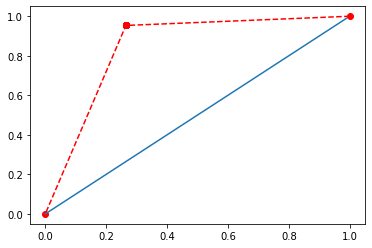

In [90]:
%matplotlib inline
plt.plot(especifities, sensibilities, marker = 'o', linestyle ='--', color = 'red')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)

In [121]:
pip install git+https://github.com/yhat/ggplot.git

  Cloning https://github.com/yhat/ggplot.git to c:\users\usuario\appdata\local\temp\pip-req-build-2js4ovpp
  Created wheel for ggplot: filename=ggplot-0.11.5-py2.py3-none-any.whl size=2073428 sha256=1ecde1178bad851d6016479bd0cb873b37b342f2f83d982b8d23f3c86febfb38
  Stored in directory: C:\Users\Usuario\AppData\Local\Temp\pip-ephem-wheel-cache-2yp6xez_\wheels\ed\79\10\d1176be58b66a7f9b20767ccf713fac10573d1cb6110162e6e
Successfully built ggplot
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/yhat/ggplot.git 'C:\Users\Usuario\AppData\Local\Temp\pip-req-build-2js4ovpp'


In [117]:
espc,sensit, p = mtr.roc_curve(y_true = y_test,y_score = prob)

Text(0, 0.5, 'Sensibilidad')

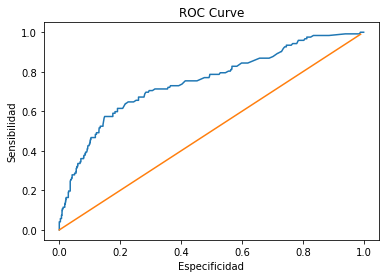

In [126]:
df = pd.DataFrame(
    {'x':espc,
     'y':sensit
                  })
%matplotlib inline
plt.plot(df.x,df.y)
plt.plot(x,y)
plt.title('ROC Curve')
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')

In [127]:
auc = mtr.auc(espc, sensit)
auc

0.7504635488712954

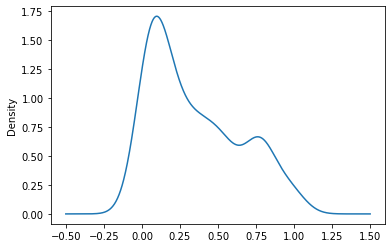

In [132]:
df.x.plot(kind='kde')


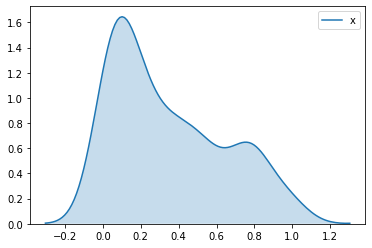

In [143]:
# ggplot(df, aes(x='x', y = 'y'))+geom_line()+geom_abline(linetype='dashed')
snb.kdeplot(df.x, shade=True)